- работает протокол HTTP и разметка с HTML;<br>
- делать HTTP-запросы из кода с помощью библиотеки requests;<br>
- с помощью библиотеки BeautifulSoup разобрать HTTP-код и найти в нём нужные данные;<br>
- работать с базовыми методами API на примере ВКонтакте (получение токена, запросы, обход основных ограничений);<br>
- в базовом варианте обеспечить автоматическое выполнение своих скриптов.

Библиотека requests

In [1]:
# Устанавливаем библиотеку requests
!pip install requests 

You should consider upgrading via the 'C:\Users\sveta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import requests # Импортируем библиотеку requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

#print(response) # Выводим значение response на экран как объект

#print(response.status_code) # Выводим числовое значение response на экран

#response = requests.get('https://www.cbr-xml-daily.ru/daily.xml')
#print(response)

#print(response.text) # Выводим содержимое атрибута text переменной response на экран


from pprint import pprint # Импортируем функцию pprint()
currencies = response.json() # Применяем метод json()
#pprint(currencies) # Выводим результат на экран

pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

print(currencies['Valute']['CZK']['Name'])

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 76.9564,
 'Value': 76.7344}
Чешских крон


In [1]:
import requests # Импортируем библиотеку requests
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url)  # Выполняем GET-запрос
#print(response.text)  # Выводим содержимое атрибута text

Библиотека BeautifulSoup

In [3]:
# Устанавливаем библиотеку BeautifulSoup
!pip install beautifulsoup4 

You should consider upgrading via the 'C:\Users\sveta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

In [7]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


Если при запросе к сайту, а затем при его разборе с помощью BeautifulSoup в тексте страницы не находится нужный тег, попробуйте вывести на печать пару тысяч символов текста страницы. Если там обнаружится нечто похожее на капчу, возможно, сайт посчитал вас роботом и отказывается выдавать содержимое. Чтобы получить его, попробуйте «притвориться» браузером при запросе из скрипта:

In [9]:
requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

#ИЗВЛЕКАЕМ ЗАГОЛОВОК И ВРЕМЯ НАПИСАНИЯ СТАТЬИ

# Применяем метод find() к объекту и выводим результат на экран
print(page.find('h1').text) 


            Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей
          


In [ ]:
# 5.4
import requests
from bs4 import BeautifulSoup 

def wiki_header(url):
    response = requests.get(url)
    page = BeautifulSoup(response.text, 'html.parser') 
    return page.find('h1').text

In [23]:
#НЕУНИКАЛЬНЫЕ ТЕГИ: ИЗВЛЕКАЕМ ТЕКСТ И ДАТУ ПУБЛИКАЦИИ СТАТЬИ

#print(page.find('div').text) # Выводим содержимое атрибута text тега div

# Выводим содержимое атрибута text тега div класса n1_material text-18
#print(page.find('div', class_='n1_material text-18').text) 

#print(page.find('div', class_='n1_material').text)
#(page.find('div', class_='n1_material text-18').text) #одинаковый результат

# Выводим на экран содержимое атрибута text тега a с классом "relative"
#print(page.find('a', class_= "relative").text)


#СБОР НЕСКОЛЬКИХ ЭЛЕМЕНТОВ: СОБИРАЕМ ВСЕ ССЫЛКИ НА СТРАНИЦЕ

url = 'https://en.wikipedia.org/wiki/List_of_programming_languages' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
print(page.find('a')) # Ищем ссылку по тегу <a> и выводим её на экран

# find выводит ТОЛЬКО ОДНУ ссылку

links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок

print([link.text for link in links[500:510]]) # Выводим ссылки с 500 по 509 включительно

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>
949
['Magma', 'Máni', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB', 'MASM Microsoft Assembly x86', 'MATH-MATIC', 'Maude system']


In [28]:
#ЗАПРОС К API ИЗ КОДА
import requests # Импортируем модуль requests
token = '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран


from pprint import pprint # Импортируем функцию pprint()
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

#  по ключу ['response'], дальше список и берем 0 элемент [0], сейчас тамтолько один элемент 0
# потом уже в переменной user мы изсписка берем по ключунужныйэлемент

user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран
print(user['first_name'])



ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bdate', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}
{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}
10.10.1984
Павел
{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'},
              {'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова'},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last

In [48]:
#6.2
import requests # Импортируем модуль requests
token = '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
ids = ",".join(map(str, range(1, 501)))
params = {'user_ids': ids, 'v': 5.95, 'fields': 'sex', 'access_token': token, 'lang': 'ru'} 
response = requests.get(url, params=params)
users = response.json()['response']

count_famale = 0
count_male = 0
count = 0
for user in users:
    if user['sex'] == 1:
        count_famale += 1
    elif user['sex'] == 2:
        count_male += 1
    else:
        count += 1
print(count_famale, count_male, count)
print(round((count_famale / (500 - count)), 2))

205 218 77
0.48


In [50]:
#СБОР ИНФОРМАЦИИ ИЗ ГРУПП

import requests # Импортируем модуль requests
token =  '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527' # Узазываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
#print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)

print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

1000


In [51]:
users_for_checking = data['response']['items'][:20] # Загружаем в переменную информацию об id первых 20 пользователей в виде списка
print(users_for_checking) # Выводим перечень id первых 20 пользователей

[6, 19, 47, 54, 79, 177, 198, 212, 219, 239, 243, 345, 407, 450, 467, 485, 510, 550, 619, 640]


In [53]:
import requests # Импортируем модуль requests
token = '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
count = 5 
offset = 0 
user_ids = [] 
max_count = 20 
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места, где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк, которое мы уже выгрузили 
    offset += count 
print(user_ids)

print(user_ids == users_for_checking) 

#работает корректно на 20 пользователях
# можем выгрузить ВСЕХ: count = 1000 и max_count = data['response']['count']

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 19, 47, 54, 79, 177, 198, 212, 219, 239, 243, 345, 407, 450, 467, 485, 510, 550, 619, 640]
True


In [54]:
#ОГРАНИЧЕНИЕ ПО ЧАСТОТЕ ЗАПРОСОВ
# с паузой во времени
import requests # Импортируем модуль requests
import time # Импортируем модуль time
token =  '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527'
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес страницы, к которой делаем запрос
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


In [58]:
#ЛАЙКИ, РЕПОСТЫ И КОММЕНТАРИИ
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
token =  '6c5ab8b66c5ab8b66c5ab8b6c36f483d3566c5a6c5ab8b60fbb920130d048871a5d1527'
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
#pprint(response.json())  

len(response.json()['response']['items']) #количкство результатов

response.json()['response']['items'][0] 

{'id': 1379495,
 'from_id': -22822305,
 'owner_id': -22822305,
 'date': 1674640860,
 'marked_as_ads': 0,
 'comments': {'can_post': 1, 'count': 1298, 'groups_can_post': True},
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1674640388,
    'id': 457338970,
    'owner_id': -22822305,
    'access_key': 'de07649bf8d463cafc',
    'post_id': 1379495,
    'sizes': [{'height': 75,
      'type': 's',
      'width': 75,
      'url': 'https://sun9-15.userapi.com/impg/QWLuXKEdw03R7JIcoo7OQF1oyaLy8WUAdYtvJg/TXX5ETgGtbg.jpg?size=75x75&quality=95&sign=f3c1738359cb5758fc870fe0c5f00b23&c_uniq_tag=BAm_gXSsXcWYr-kQbsL4ws5Q6M9HBbD4EajFYrfWRRs&type=album'},
     {'height': 130,
      'type': 'm',
      'width': 130,
      'url': 'https://sun9-15.userapi.com/impg/QWLuXKEdw03R7JIcoo7OQF1oyaLy8WUAdYtvJg/TXX5ETgGtbg.jpg?size=130x130&quality=95&sign=5cac3b1d649434c455f17a8695d87701&c_uniq_tag=TAHDVqKZ-iiEwyGliF4vY9q3aJXAt-2isFxCOegLPuI&type=album'},
     {'height': 604,
      'type':

In [59]:
#итоговую статистику для последних десяти непустых сообщений в словарь stats.
# В качестве ключа будем использовать начало сообщения (если начало сообщения пустое,
# то информацию о таком сообщении проигнорируем),
# в качестве значения — список с тремя интересующими нас метриками и временем публикации
# (комментарии, лайки, репосты, дата публикации)

stats = {} 
count_post = 0 # Счётчик «непустых» сообщений
for record in response.json()['response']['items'][:]:
    title = record['text'][:30] 
    if title: 
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date']] 
        count_post += 1 
    if count_post < 10: 
        continue 
    else: 
        break 
pprint(stats)

{'CEO ВКонтакте Марина Краснова ': [177, 1462, 640, 1672419951],
 'А вот и рейтинг главных мемов ': [446, 4573, 1423, 1672210020],
 'В VK Музыке появился раздел с ': [403, 921, 226, 1674461351],
 'В предновогодней суете вы могл': [812, 1413, 1470, 1673607471],
 'ВКонтакте есть добрая новогодн': [131, 1914, 608, 1672300776],
 'Год выдался насыщенным на техн': [310, 1264, 452, 1672061199],
 'Предупредим вас о потенциально': [260, 1432, 512, 1672123320],
 'Рассказываем, как вы отметили ': [136, 1188, 1378, 1673536380],
 'С Днём студента! К этой дате м': [1298, 1200, 490, 1674640860],
 'Что обсуждали, смотрели и слуш': [226, 1706, 629, 1672328610]}


API для разработчиков предоставляют и многие другие платформы. Вот список, пожалуй, самых популярных из них:

Google Maps API
YouTube API
Twitter API
Facebook API
Информацию о сторонних API можно найти в каталоге Web API. Также можно воспользоваться интернет-поиском, указав в строке поиска, например, «курсы валют API» или «прогноз погоды api»

СКРИПТЫ запуск по крону

In [61]:
#КАК НАСТРОИТЬ АВТОМАТИЧЕСКИЙ ЗАПУСК

# Устанавливаем библиотеку schedule
!pip install schedule
import schedule # Импортируем модуль schedule

You should consider upgrading via the 'C:\Users\sveta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [64]:
#ПОСТАНОВКА ЗАДАЧИ

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(15).minutes.do(task)
schedule.every(1).hour.do(task)

Every 1 hour do task() (last run: [never], next run: 2023-02-08 13:18:33)

In [ ]:
#ВЫПОЛНЕНИЕ ФУНКЦИИ

import schedule

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(15).minutes.do(task)

import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

# АТТЕСТАЦИЯ

In [15]:
counter = 0

def increment():
   counter += 1

increment()

UnboundLocalError: local variable 'counter' referenced before assignment

In [21]:
# 4
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")

three = one + two
one.extend(two) #notm
two.extend(one)
three = two + ("f", 'g')#norm

TypeError: can only concatenate list (not "tuple") to list

In [25]:
# 8
config = {
    "server": {
        "host": "127.0.0.1",
        "port": "22"
    },
    "configuration": {
        "ssh": {
            "access": True,
            "login": "some",
            "password": "some"
        },
        "name": "2491Oaaf1414"
    }
}
config['configuration']['ssh']['login']

'some'

In [28]:
19. # Функция чтения данных
def read_data():
    data = open('war_peace_processed.txt', 'rt', encoding='utf-8').read()
    data = data.split('\n')
    return data


# Функция подсчёта частоты употребления слова в тексте
def freq(target_word):  
    new_dict = dict() 
    for i in data: # СТРОКА С ОШИБКОЙ Использование локальной переменной, невидимой для вызываемой функции 
        if i not in new_dict:
            new_dict[i] = 1
        else:
            new_dict[i] = new_dict.get(i) + 1
    return new_dict.get(target_word, 0)


# Вызов функций
read_data()
freq('война')

NameError: name 'data' is not defined

 24 В вашем распоряжении имеется DataFrame users с пользователями (столбец user_id) и их действиями (столбец action) на сайте компании. С помощью какого варианта кода можно найти ТОП-5 самых активных пользователей и число их действий (активность — число действий)?

In [ ]:
# 24
users.groupby('user_id')['action'].count().sort_values(ascending=False).iloc[:5]

2.1 Вам предоставлен словарь products, ключами которого являются названия продуктов, а значениями — их цены. Затем вы получаете другой словарь (stocks), ключи которого — товары, а значения — скидки (в процентах) на товары.

Напишите функцию apply_discounts(products, stocks), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены. Если продукта из словаря products нет в словаре stocks, то скидка к нему не применяется. Цены округлите до второго знака после запятой.

In [ ]:
def apply_discounts(products, stocks):
    products_discount = {}
    
    for key in stocks.keys():
        stocks[key]= round(float(stocks[key].replace('%',''))/100,2)
        
    for key, value in products.items():
        if key in stocks:
             products_discount[key] = round(value - (value * stocks[key]),2)
        else:
            products_discount[key] = value
            
    return products_discount


2.2
Вам даны два файла, bronze_top и silver_top (пути к ним заданы в Codeboard), в которых хранится информация о ТОП-5 стран по числу бронзовых и серебряных медалей соответственно. В каждой таблице два одинаковых столбца: Country — страна и Total — число медалей. 

Объедините две таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые попали в оба рейтинга. При этом в качестве суффиксов укажите строки "_bronze" и "_silver", чтобы столбцы таблиц, не участвовавших в объединении, можно было различать.

Результат занесите в переменную merged.

In [ ]:
# Введите свое решение ниже
import pandas as pd

bronze_data = pd.read_csv('bronze_top.csv')
silver_data = pd.read_csv('silver_top.csv')

merged = bronze_data.merge(silver_data, how='inner', on='Country', suffixes=['_bronze', '_silver'])

# 3!

In [34]:
import pandas as pd
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.tail()

,date,cum_power
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0
663,2018-10-26,28120.0


3.1  В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [69]:
#пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями
#проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power
# среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого
import pandas as pd
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.tail()

for i in range(len(solar_data['cum_power'])):
    if solar_data['cum_power'][i] == -1:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2

round(solar_data['cum_power'].mean())

C:\Users\sveta\AppData\Local\Temp\ipykernel_5968\213617129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2


23848

3.2
Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.<br>

Ежедневную выработку можно рассчитать как разницу между двумя последовательными показателями cum_power. Это можно сделать с помощью метода diff().

In [91]:
#3.2
import pandas as pd
import seaborn as sns

solar_data = pd.read_csv('data/solarpower.csv')
solar_data.tail()

for i in range(len(solar_data['cum_power'])):
    if solar_data['cum_power'][i] == -1:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2


solar_data['day_power']=solar_data['cum_power'].diff()
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data['date'] = solar_data['date'].dt.to_period('M')
#mean_solar_data = solar_data.groupby('date', as_index=False)['day_power'].mean()
#display(mean_solar_data)

round(solar_data[solar_data['date']=='2017-03']['day_power'].mean(), 2)

C:\Users\sveta\AppData\Local\Temp\ipykernel_5968\1415926795.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10.77

<AxesSubplot: >

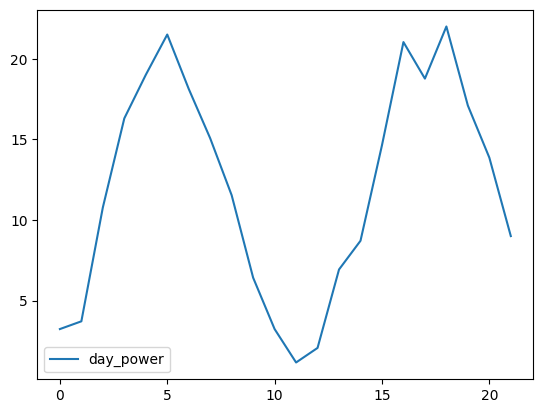

In [86]:
sns.lineplot(data=mean_solar_data)

3.3
Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

В периоды осень-зима наблюдается наименьшая выработка солнечной энергии, в периоды весна-лета — наибольшая. верно
В периоды весна-лета наблюдается наименьшая выработка солнечной энергии, в периоды осень-зима — наибольшая.
Выработка солнечной энергии примерно одинакова во все сезоны.